In [843]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Dummy Classisfier

In [844]:
#import pandas as pd
#import numpy as np
#from sklearn.dummy import DummyClassifier

#train = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
#test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")


#X = train.drop(columns=['target'])
#y = train['target']

#dummy_class = DummyClassifier()
#dummy_class.fit(X,y)
#y_pred = dummy_class.predict(test)

#sample = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv")
#sample['target'] = y_pred

#sample.to_csv("submission.csv",index=False)

# Importing the Libraries :


In [845]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Loading the DataSet :

In [846]:
train = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

# Exploring the DATASET:  EDA and Visualisation

# Performing Basic EDA

### Dataset Head

In [847]:
train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


### Dataset Tail

In [848]:
train.tail()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no
39210,2010-03-16,51,student,divorced,tertiary,yes,38594,yes,no,cellular,1877,19,780,148,success,yes


# Null Values in Dataset

In [849]:
train.isna().sum()/len(train)*100

last contact date     0.000000
age                   0.000000
job                   0.584020
marital               0.000000
education             3.741297
default               0.000000
balance               0.000000
housing               0.000000
loan                  0.000000
contact              26.359950
duration              0.000000
campaign              0.000000
pdays                 0.000000
previous              0.000000
poutcome             75.109026
target                0.000000
dtype: float64

### The columns with the most significant amount of missing data are:
### contact: 26.36%
### poutcome: 75.11%
    
### Overall Null Percentage in Dataset: 6.61%

# Description of Dataset :

In [850]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


# Descriptions for each column:
### age: The age of the individual.
### balance: The balance in the individual's account.
### duration: The duration of the last contact with the individual (in seconds).
### campaign: The number of contacts made during this campaign.
### pdays: The number of days that passed after the client was last contacted from a previous campaign.
### previous: The number of contacts made before this campaign (from previous campaigns).

# Number of Unique Values

In [851]:
categorical_columns = []
for i in train.columns:
    print(f"{i} : {train[i].nunique()}")
    if int(train[i].nunique())<=1000:
        categorical_columns.append(i)

last contact date : 1013
age : 78
job : 11
marital : 3
education : 3
default : 2
balance : 9535
housing : 2
loan : 2
contact : 2
duration : 3146
campaign : 63
pdays : 865
previous : 276
poutcome : 3
target : 2


# Info about the Datatypes

In [852]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

# Count of Values in Each Categorical Column

In [853]:
for i in categorical_columns:
    print(train[i].value_counts()/len(train)*100)
    print()

age
32    4.304914
31    4.154446
33    4.077937
35    4.006529
34    3.993777
        ...   
18    0.112213
92    0.104562
87    0.102012
85    0.099462
95    0.005101
Name: count, Length: 78, dtype: float64

job
blue-collar      19.831170
management       19.030374
technician       15.500752
admin.           10.497054
services          8.479763
self-employed     4.748667
retired           4.651756
entrepreneur      4.603300
unemployed        4.297264
housemaid         4.223305
student           3.552575
Name: count, dtype: float64

marital
married     57.868965
single      28.690929
divorced    13.440106
Name: count, dtype: float64

education
secondary    49.945168
tertiary     29.621790
primary      16.691745
Name: count, dtype: float64

default
no     94.243962
yes     5.756038
Name: count, dtype: float64

housing
yes    55.23195
no     44.76805
Name: count, dtype: float64

loan
no     81.150698
yes    18.849302
Name: count, dtype: float64

contact
cellular     63.834128
telephone 

# Performing UniVariate Analysis :

In [854]:
train.columns

Index(['last contact date', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'target'],
      dtype='object')

## last contact date

In [855]:
train['last contact date'].head()

0    2009-04-17
1    2009-10-11
2    2010-11-20
3    2009-09-01
4    2008-01-29
Name: last contact date, dtype: object

In [856]:
train['last contact date'].describe()

count          39211
unique          1013
top       2009-05-15
freq             313
Name: last contact date, dtype: object

In [857]:
train['last contact date'] = pd.to_datetime(train['last contact date'])
train['lcd_year'] = train['last contact date'].dt.year
train['lcd_month'] = train['last contact date'].dt.month
train['lcd_weekday'] = train['last contact date'].dt.weekday

In [858]:
test['last contact date'] = pd.to_datetime(test['last contact date'])
test['lcd_year'] = test['last contact date'].dt.year
test['lcd_month'] = test['last contact date'].dt.month
test['lcd_weekday'] = test['last contact date'].dt.weekday

In [859]:
#train.rename(columns={'Lcd_weekday': 'lcd_weekday'}, inplace=True)

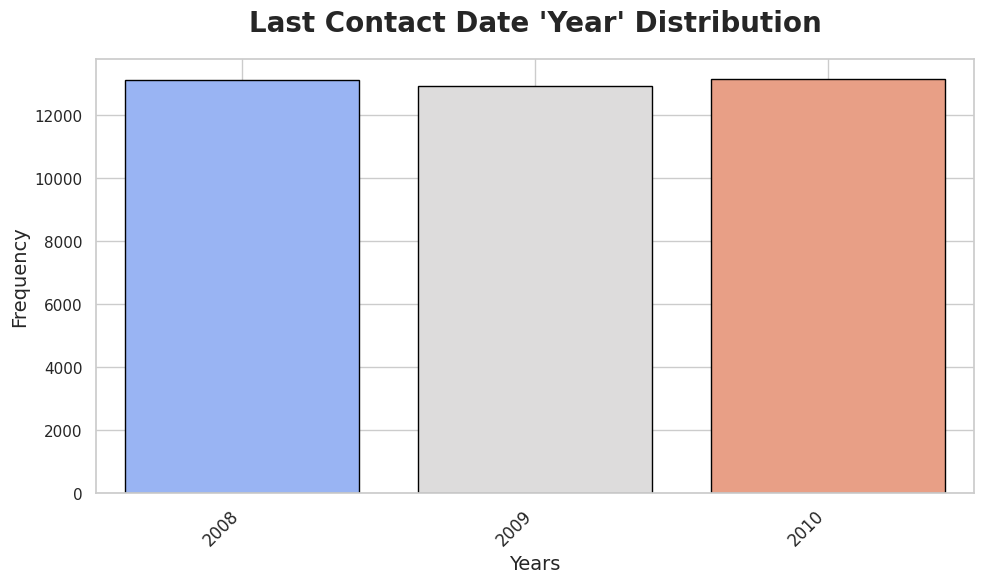

In [860]:
year_value_counts = train['lcd_year'].value_counts().sort_index()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=year_value_counts.index, y=year_value_counts.values, palette='coolwarm', saturation=0.8, edgecolor='black')
plt.title("Last Contact Date 'Year' Distribution", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights:
### This bar plot displays the distribution of contacts made over three years: 2008, 2009, and 2010.
### The frequencies across the three years are very close, all hovering around 12,000, suggesting consistent levels of contact over these years.
### No significant year-to-year variation is observed, meaning that the amount of contact each year remained relatively steady across this period.

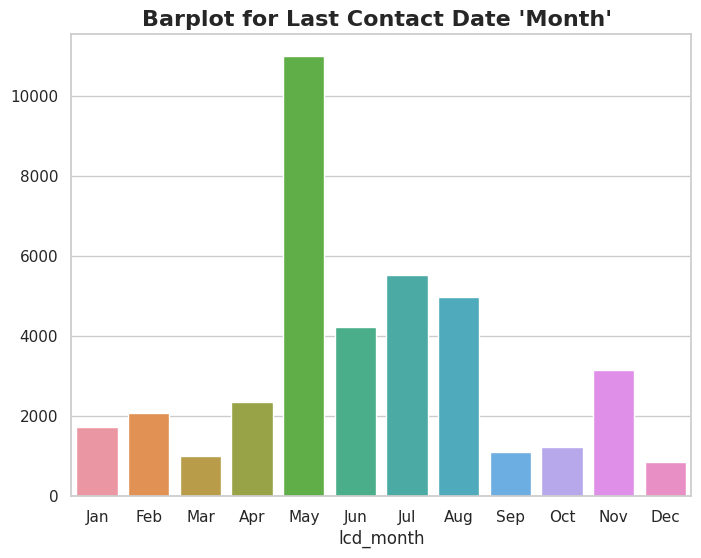

In [861]:
month_value_counts = train['lcd_month'].value_counts().sort_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=month_value_counts.index, y=month_value_counts.values)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Barplot for Last Contact Date 'Month' ", fontsize=16, fontweight='bold')
plt.show()

### Insights:
### May has an overwhelmingly high count compared to the other months, with more than 10,000 instances of last contacts. This suggests that May was the most active month for contacts by a significant margin.
### June, July, and August also show relatively high contact counts, with around 6,000 to 7,000 instances, making them the next most active months after May.
### November and April have moderate activity, while January, February, March, September, October, and December show significantly lower contact volumes.
### March and December are the months with the least activity, indicating that fewer contacts were made during these months.

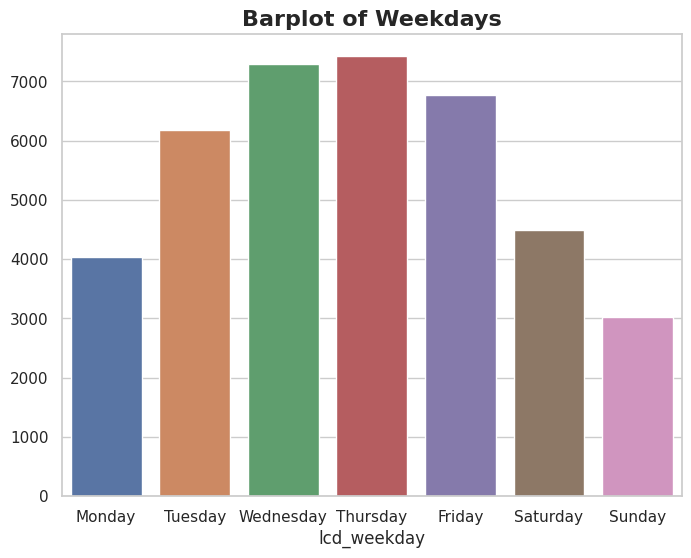

In [862]:
weekday_value_counts = train['lcd_weekday'].value_counts().sort_index()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=weekday_value_counts.index, y=weekday_value_counts.values)
ax.set_xticks(weekday_value_counts.index)
ax.set_xticklabels(day_names)
plt.title("Barplot of Weekdays", fontsize=16, fontweight='bold')
plt.show()

### Insights:
### Highest Values: Wednesday and Thursday show the highest values, both nearing 7,000 occurrences.
### Friday follows closely but is slightly lower than Wednesday and Thursday.
### Saturday shows a significant drop in frequency, with Sunday having the lowest value.
### Trend: The middle of the week (Wednesday and Thursday) has the highest engagement or activity, while weekends (Saturday and Sunday) show a downward trend.

## age


In [863]:
train['age'].head()

0    26
1    52
2    44
3    33
4    31
Name: age, dtype: int64

In [864]:
train['age'].describe()

count    39211.000000
mean        42.120247
std         12.709352
min         18.000000
25%         33.000000
50%         40.000000
75%         50.000000
max         95.000000
Name: age, dtype: float64

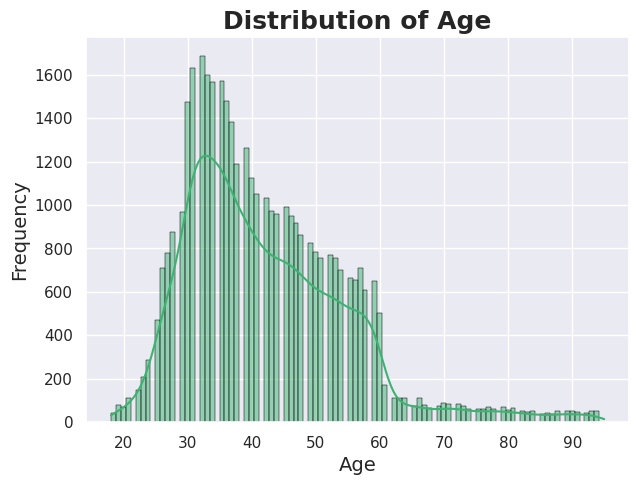

In [865]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
plt.figure(figsize=(7,5)) 
sns.histplot(x=train['age'], bins=100, color='mediumseagreen', kde=True, edgecolor='black')
plt.title("Distribution of Age", fontsize=18, fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True) 
plt.show()

### Insights:
### Majority Age Group: Most individuals are between 30 and 40 years old, representing the peak of the distribution.
### Right-Skewed Pattern: The distribution is right-skewed, with fewer individuals in older age groups (60+).
### Gradual Decline: The frequency of individuals decreases consistently after 40 years of age, with very few above 80.

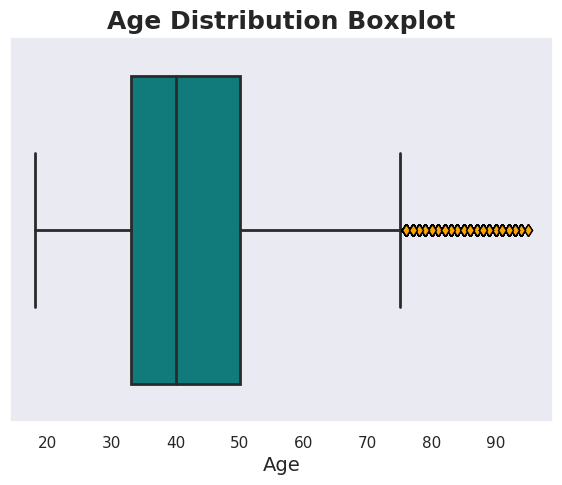

In [866]:
sns.set_style("dark")
plt.figure(figsize=(7,5)) 
sns.boxplot(
    x=train['age'], 
    color='darkcyan',    
    linewidth=2, 
    fliersize=6, 
    flierprops={'markerfacecolor':'orange', 'markeredgecolor':'black'}  
)
plt.title("Age Distribution Boxplot", fontsize=18, fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.tick_params()
plt.show()


In [867]:
from scipy.stats import skew
print(skew(train['age']))

1.1242348167399974


### Insights :
### The age distribution is concentrated mostly between 33 and 50 years.
### There are a few older individuals (beyond 70) who are outliers.¶
### The data is slightly skewed to the right (1.12).

## job

In [868]:
train['job'].value_counts()

job
blue-collar      7776
management       7462
technician       6078
admin.           4116
services         3325
self-employed    1862
retired          1824
entrepreneur     1805
unemployed       1685
housemaid        1656
student          1393
Name: count, dtype: int64

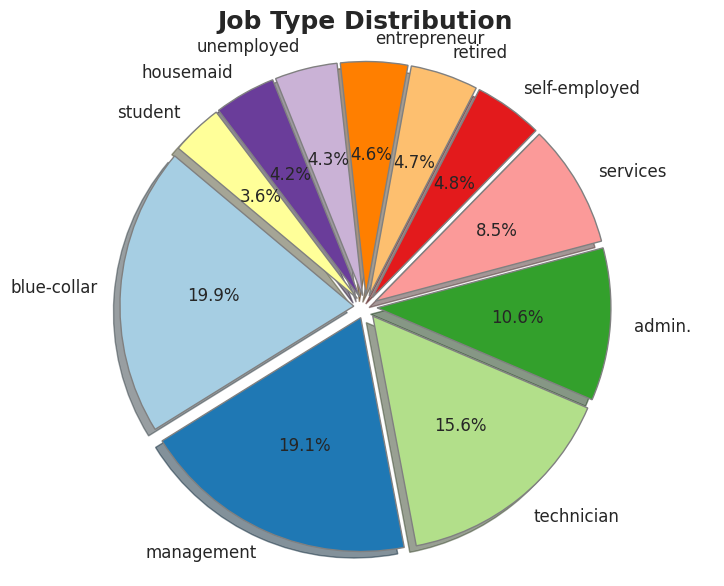

In [869]:
values = list(train['job'].value_counts().keys())
proportion = list(train['job'].value_counts().values)
colors = plt.cm.Paired(range(len(values)))
explode = [0.05] * len(values)
plt.figure(figsize=(9, 7))
plt.pie(x=proportion, labels=values, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, 
        startangle=140, wedgeprops={'edgecolor': 'gray'}, textprops={'fontsize': 12})
plt.title("Job Type Distribution", fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

### Insights:
### Blue-collar (19.9%) and management (19.1%) jobs are the most common categories, collectively making up nearly 40% of the distribution.
### Technicians account for 15.6%, indicating that a significant portion of the population works in technical fields.
### Administrative roles (10.6%) and services (8.5%) follow, contributing moderately to the distribution.
### Less common job categories include self-employed (4.8%), retired (4.7%), and entrepreneurs (4.6%).
### Students, housemaids, and unemployed make up the smallest portions, around 3-4%.

## marital

In [870]:
train['marital'].head()

0    married
1    married
2    married
3    married
4     single
Name: marital, dtype: object

In [871]:
train['marital'].value_counts()

marital
married     22691
single      11250
divorced     5270
Name: count, dtype: int64

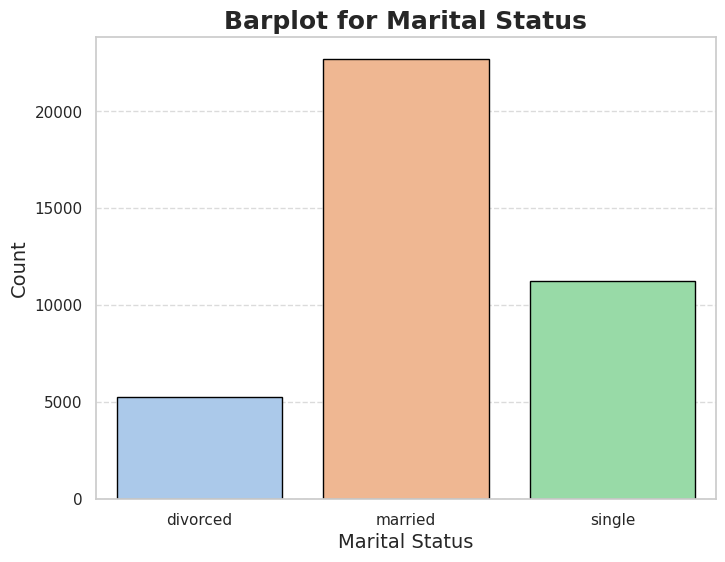

In [872]:
sns.set(style="whitegrid")
sub_value_counts = train['marital'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=sub_value_counts.index, y=sub_value_counts.values, palette='pastel', edgecolor='black')
plt.title("Barplot for Marital Status", fontsize=18, fontweight='bold')
plt.xlabel("Marital Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insights:
### Married individuals dominate the dataset, with a count exceeding 20,000, making it the largest category by far.
### Single individuals follow, with a count between 10,000 and 15,000.
### Divorced individuals form the smallest group, with a count around 5,000.

## education

In [873]:
train['education'].head()

0    secondary
1    secondary
2    secondary
3    secondary
4     tertiary
Name: education, dtype: object

In [874]:
train['education'].value_counts()

education
secondary    19584
tertiary     11615
primary       6545
Name: count, dtype: int64

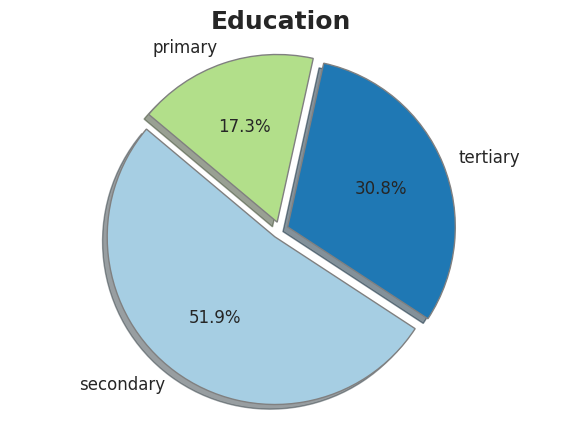

In [875]:
values = list(train['education'].value_counts().keys())
proportion = list(train['education'].value_counts().values)
colors = plt.cm.Paired(range(len(values)))
explode = [0.05] * len(values)
plt.figure(figsize=(7, 5))
plt.pie(x=proportion, labels=values, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, 
        startangle=140, wedgeprops={'edgecolor': 'gray'}, textprops={'fontsize': 12})
plt.title("Education", fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

### Insights:
### Secondary education represents the majority, accounting for 51.9% of the population.
### Tertiary education follows, covering 30.8%.
### Primary education makes up the smallest portion, with 17.3%.

## default

In [876]:
train['default'].head()

0    no
1    no
2    no
3    no
4    no
Name: default, dtype: object

In [877]:
train['default'].value_counts()

default
no     36954
yes     2257
Name: count, dtype: int64

Insights

## balance

In [878]:
train['balance'].head()

0     647
1     553
2    1397
3     394
4     137
Name: balance, dtype: int64

In [879]:
train['balance'].value_counts()

balance
0        2799
1         149
2         122
4         115
3         104
         ... 
95094       1
81074       1
31565       1
5278        1
38594       1
Name: count, Length: 9535, dtype: int64

In [880]:
train['balance'].describe()

count     39211.000000
mean       5441.781719
std       16365.292065
min       -8019.000000
25%          98.000000
50%         549.000000
75%        2030.000000
max      102127.000000
Name: balance, dtype: float64

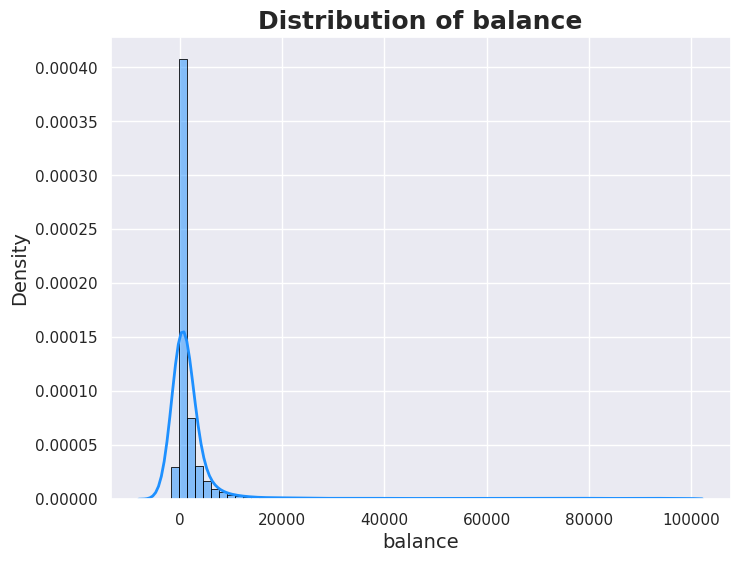

In [881]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.histplot(x=train['balance'], bins=70, color='dodgerblue', kde=True, edgecolor='black', 
             stat="density", line_kws={'color': 'blue', 'linewidth': 2})
plt.title("Distribution of balance", fontsize=18, fontweight='bold')
plt.xlabel("balance", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)
plt.show()

### Insights :
### The distribution is highly right-skewed, with the majority of the data concentrated near zero and a long tail extending to the right.
### Most balances fall well below 20,000, with only a few accounts showing significantly higher values.
### The density peak near zero indicates that many individuals have relatively low balances, while the tail confirms the presence of outliers with high balances.

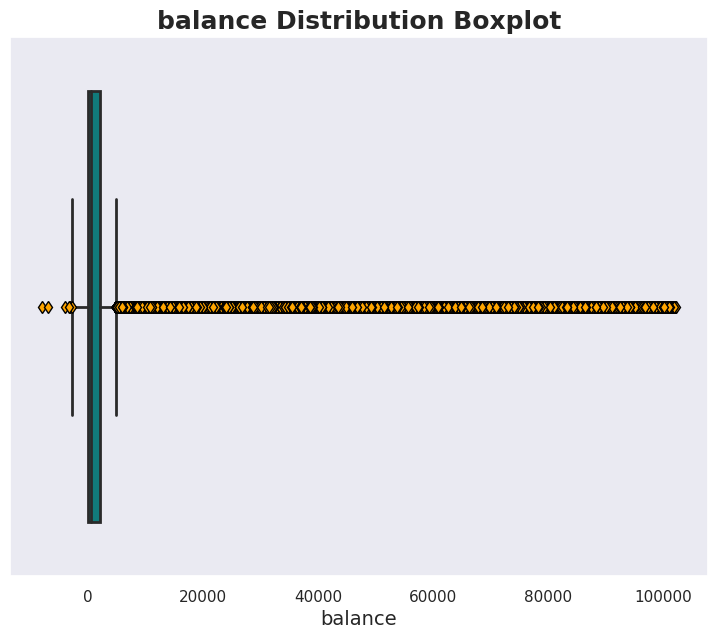

In [882]:
sns.set_style("dark")
plt.figure(figsize=(9,7))
sns.boxplot(
    x=train['balance'], 
    color='darkcyan',    
    linewidth=2, 
    fliersize=6, 
    flierprops={'markerfacecolor':'orange', 'markeredgecolor':'black'}  
) 
plt.title("balance Distribution Boxplot", fontsize=18, fontweight='bold')
plt.xlabel("balance", fontsize=14)
plt.tick_params()
plt.show()

In [883]:
from scipy.stats import skew
print(skew(train['balance']))

4.06343156455544


### Insights :
### The balance distribution is heavily skewed to the right, with a skewness of 4.06.
### Most balances are concentrated at the lower end, with values below 2,030 (75th percentile).
### There are a few extremely high balances (up to 102,127) that act as outliers.
### The mean balance of 5,441.78 is much higher than the median 549, highlighting the impact of outliers.
### Negative balances exist (minimum of -8,019), which may indicate overdrafts or errors and need further investigation.

## housing

In [884]:
train['housing'].head()

0    yes
1    yes
2     no
3    yes
4     no
Name: housing, dtype: object

In [885]:
train['housing'].value_counts()

housing
yes    21657
no     17554
Name: count, dtype: int64

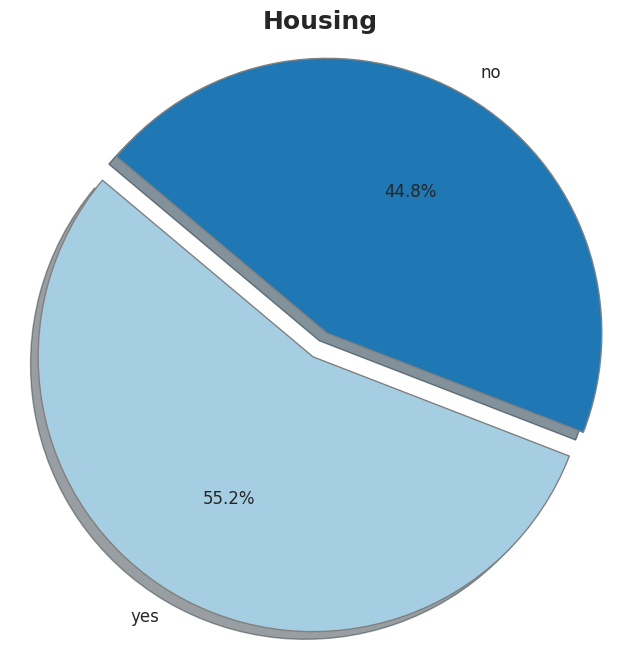

In [886]:
values = list(train['housing'].value_counts().keys())
proportion = list(train['housing'].value_counts().values)
colors = plt.cm.Paired(range(len(values)))
explode = [0.05] * len(values)
plt.figure(figsize=(8, 8))
plt.pie(x=proportion, labels=values, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, 
        startangle=140, wedgeprops={'edgecolor': 'gray'}, textprops={'fontsize': 12})
plt.title("Housing", fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

### Insights:
### 55.2% people have a housing
### 44.8% people do not have a hous

## loan

In [887]:
train['loan'].head()

0    no
1    no
2    no
3    no
4    no
Name: loan, dtype: object

In [888]:
train['loan'].value_counts()

loan
no     31820
yes     7391
Name: count, dtype: int64

In [889]:
train['loan'].describe()

count     39211
unique        2
top          no
freq      31820
Name: loan, dtype: object

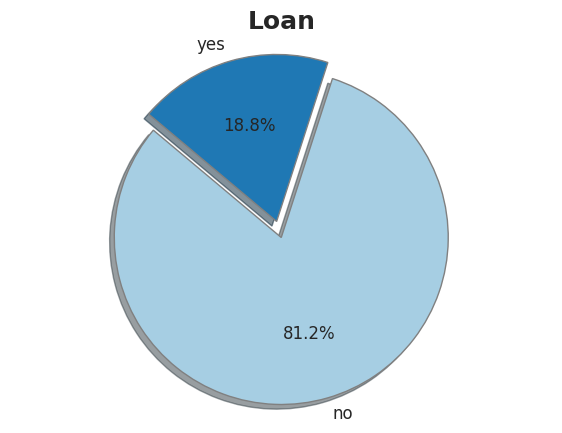

In [890]:
values = list(train['loan'].value_counts().keys())
proportion = list(train['loan'].value_counts().values)
colors = plt.cm.Paired(range(len(values)))
explode = [0.05] * len(values)
plt.figure(figsize=(7, 5))
plt.pie(x=proportion, labels=values, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, 
        startangle=140, wedgeprops={'edgecolor': 'gray'}, textprops={'fontsize': 12})
plt.title("Loan", fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

### Insights :
### "No" Segment: This light blue section comprises 81.2% of the total, indicating that the majority (over four-fifths) of the population or sample did not take out a loan.
### "Yes" Segment: The dark blue slice makes up 18.8%, representing those who have taken out a loan.

## contact

In [891]:
train['contact'].head()

0     cellular
1    telephone
2     cellular
3    telephone
4     cellular
Name: contact, dtype: object

In [892]:
train['contact'].value_counts()

contact
cellular     25030
telephone     3845
Name: count, dtype: int64

In [893]:
train['contact'].describe()

count        28875
unique           2
top       cellular
freq         25030
Name: contact, dtype: object

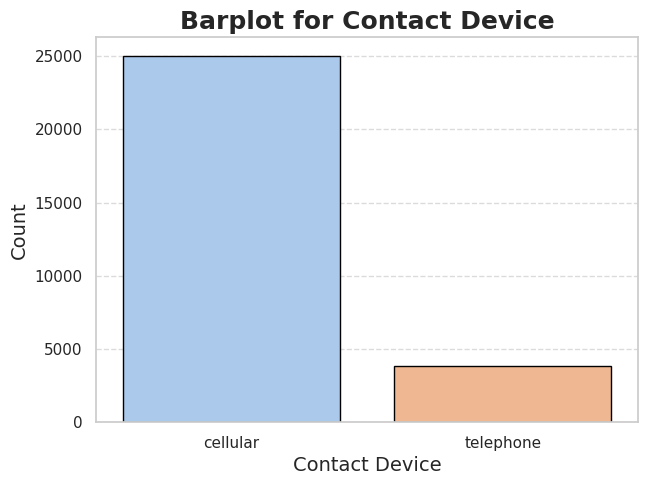

In [894]:
sns.set(style="whitegrid")
sub_value_counts = train['contact'].value_counts().sort_index()
plt.figure(figsize=(7, 5))
sns.barplot(x=sub_value_counts.index, y=sub_value_counts.values, palette='pastel', edgecolor='black')
plt.title("Barplot for Contact Device", fontsize=18, fontweight='bold')
plt.xlabel("Contact Device", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insigths:
### Cellular: Represented by the taller blue bar, this category has a significantly higher count, around 25,000. This suggests that cellular phones are the predominant contact method used in this dataset.
### Telephone: The shorter orange bar, with a count below 5,000, indicates a much lower usage of traditional telephones compared to cellular devices.

## duration

In [895]:
train['duration'].head()

0    357
1    160
2    326
3    104
4    445
Name: duration, dtype: int64

In [896]:
train['duration'].value_counts()

duration
124     162
114     149
90      145
139     145
89      145
       ... 
2303      1
3808      1
1299      1
2054      1
1631      1
Name: count, Length: 3146, dtype: int64

In [897]:
train['duration'].describe()

count    39211.000000
mean       439.062789
std        769.096291
min          0.000000
25%        109.000000
50%        197.000000
75%        380.000000
max       4918.000000
Name: duration, dtype: float64

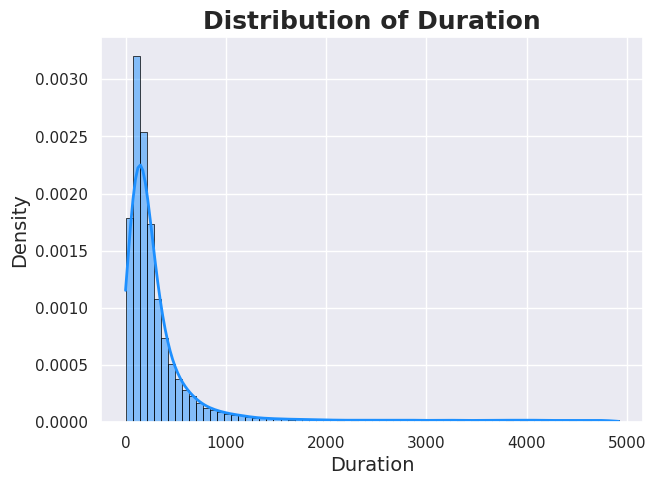

In [898]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
plt.figure(figsize=(7, 5))
sns.histplot(x=train['duration'], bins=70, color='dodgerblue', kde=True, edgecolor='black', 
             stat="density", line_kws={'color': 'blue', 'linewidth': 2})
plt.title("Distribution of Duration", fontsize=18, fontweight='bold')
plt.xlabel("Duration", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)
plt.show()

### Insights :
### The distribution of durations is highly right-skewed, with most durations concentrated near zero and a long tail extending towards higher values.
### The data shows a high frequency of short durations, with fewer instances of longer ones. 
### There are small secondary peaks, indicating possible subgroups in the data.

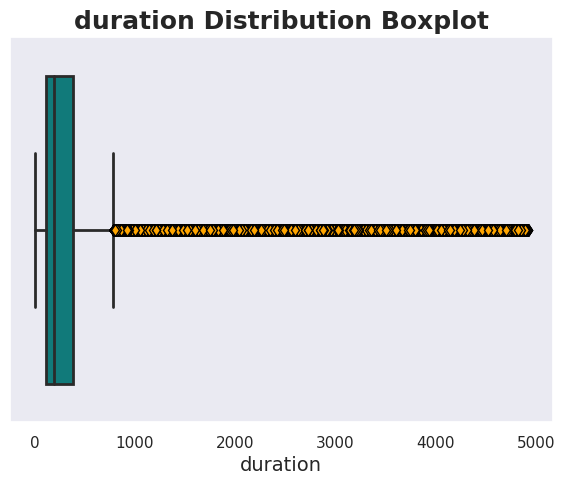

In [899]:
sns.set_style("dark")
plt.figure(figsize=(7,5))
sns.boxplot(
    x=train['duration'], 
    color='darkcyan',    
    linewidth=2, 
    fliersize=6, 
    flierprops={'markerfacecolor':'orange', 'markeredgecolor':'black'}  
)
plt.title("duration Distribution Boxplot", fontsize=18, fontweight='bold')
plt.xlabel("duration", fontsize=14)
plt.tick_params()
plt.show()

### Insights :
### This box plot shows that most durations are clustered at lower values, with a median close to zero. A substantial number of outliers extend up to 5,000, indicating rare instances of long durations. The data is heavily skewed with a few high-duration outliers.

## campaign

In [900]:
train['campaign'].head()

0    2
1    1
2    1
3    3
4    2
Name: campaign, dtype: int64

In [901]:
train['campaign'].value_counts()

campaign
1     14013
2     10016
3      4470
4      2861
5      1469
      ...  
48       44
30       43
40       43
60       43
53       38
Name: count, Length: 63, dtype: int64

In [902]:
train['campaign'].describe()

count    39211.000000
mean         5.108770
std          9.890153
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         63.000000
Name: campaign, dtype: float64

In [903]:
train['campaign'].nunique()

63

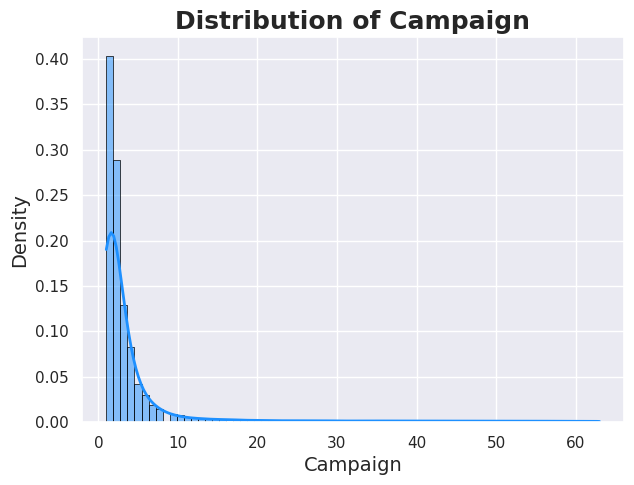

In [904]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
plt.figure(figsize=(7, 5))
sns.histplot(x=train['campaign'], bins=70, color='dodgerblue', kde=True, edgecolor='black', 
             stat="density", line_kws={'color': 'blue', 'linewidth': 2})
plt.title("Distribution of Campaign", fontsize=18, fontweight='bold')
plt.xlabel("Campaign", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)
plt.show()

### Insights :
### Right-Skewed Distribution: The distribution is right-skewed, with most values concentrated near the lower end (around 0 to 5 campaigns).
### Long Tail: The histogram shows a long tail extending up to 60 campaigns, indicating that while most participants had fewer campaigns, some had significantly more.
### Peak Density: The highest density occurs at the lower range, specifically at around 1-2 campaigns, indicating a high frequency of low campaign counts.

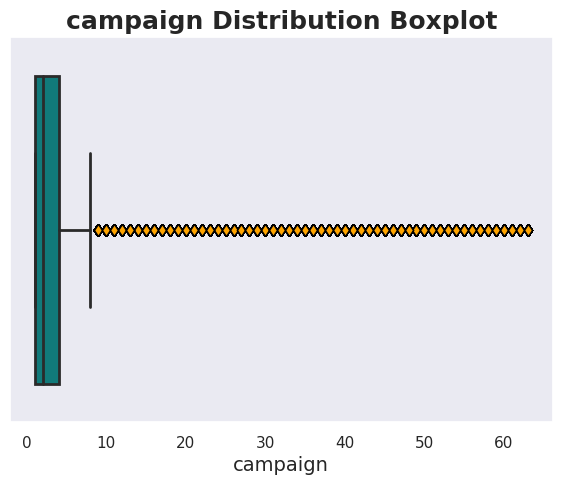

In [905]:
sns.set_style("dark")
plt.figure(figsize=(7,5))
sns.boxplot(
    x=train['campaign'], 
    color='darkcyan',    
    linewidth=2, 
    fliersize=6, 
    flierprops={'markerfacecolor':'orange', 'markeredgecolor':'black'}  
)
plt.title("campaign Distribution Boxplot", fontsize=18, fontweight='bold')
plt.xlabel("campaign", fontsize=14)
plt.tick_params()
plt.show()

### Insights :
### Presence of Outliers: The boxplot shows a large number of outliers beyond the whiskers (over 10 campaigns). This indicates that while most values lie in a narrow range, some cases with many campaigns are present.
### Concentrated Data: The interquartile range (IQR) is very narrow, with most values being tightly packed between 1 and 3 campaigns.
### Skewness Visible: The long right-side tail confirms the right-skewness of the data, where the majority of values are low, but a few have significantly higher campaign counts.

## pdays

In [906]:
train['pdays'].head()

0    331
1     -1
2     -1
3     -1
4     -1
Name: pdays, dtype: int64

In [907]:
train['pdays'].value_counts()

pdays
-1      29446
 182      135
 92       117
 91       106
 183      100
        ...  
 836        1
 594        1
 659        1
 817        1
 724        1
Name: count, Length: 865, dtype: int64

In [908]:
train['pdays'].describe()

count    39211.000000
mean        72.256051
std        160.942593
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

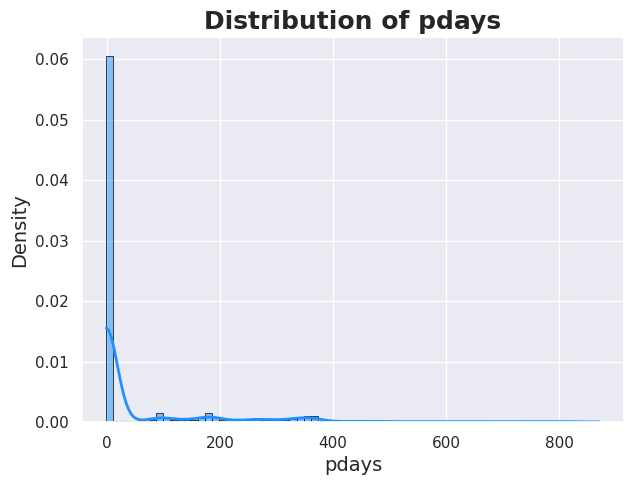

In [909]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
plt.figure(figsize=(7, 5))

sns.histplot(x=train['pdays'], bins=70, color='dodgerblue', kde=True, edgecolor='black', 
             stat="density", line_kws={'color': 'blue', 'linewidth': 2})
plt.title("Distribution of pdays", fontsize=18, fontweight='bold')
plt.xlabel("pdays", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True) 
plt.show()

### Insights:
### Skewed Distribution: The distribution is heavily skewed to the right, with the majority of values concentrated near 0. This suggests that most customers were either recently contacted or have never been contacted (represented by 0).
### Long Tail: There are a few customers with high pdays values, shown by the long tail stretching beyond 400 and even up to 800, though these are rare.
### Potential Insights: The spike at 0 might indicate a large proportion of customers who have not been contacted recently, making them prime targets for a new campaign. The long tail could represent outliers.

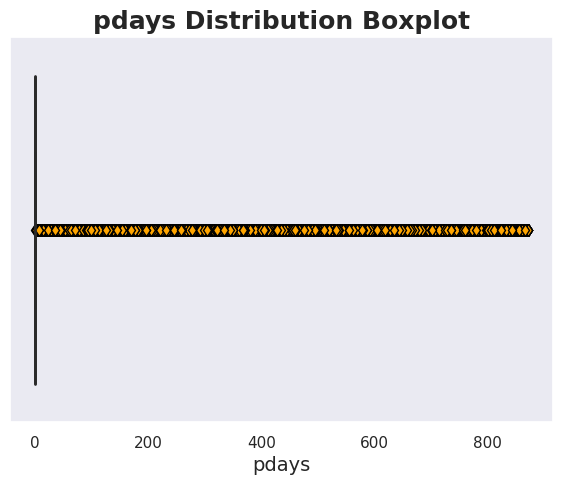

In [910]:
sns.set_style("dark")
plt.figure(figsize=(7,5))
sns.boxplot(
    x=train['pdays'], 
    color='darkcyan',    
    linewidth=2, 
    fliersize=6, 
    flierprops={'markerfacecolor':'orange', 'markeredgecolor':'black'}  
)

plt.title("pdays Distribution Boxplot", fontsize=18, fontweight='bold')
plt.xlabel("pdays", fontsize=14)
plt.tick_params()
plt.show()

### Insights :
### Outlier Presence: The absence of distinct boxplot elements (quartiles, median, etc.) suggests the dataset is dominated by a large number of zeros or values near the lower end of the scale. The boxplot is compressed, and the long whisker points to the extreme values (outliers) that extend past 800.
### Interpretation: This confirms the histogram insight—there are extreme values (outliers) in pdays, but the vast majority of the data is concentrated near zero. Boxplots like this one are typically used to visualize the spread and identify any skewness or outliers in the data. In this case, the spread is very tight with a few extreme outliers.

## previous

In [911]:
train['previous'].head()

0    1
1    0
2    0
3    0
4    0
Name: previous, dtype: int64

In [912]:
train['previous'].value_counts()

previous
0      29456
1       2226
2       1708
3        907
4        590
       ...  
163        5
76         5
180        5
137        5
231        4
Name: count, Length: 276, dtype: int64

In [913]:
train['previous'].describe()

count    39211.000000
mean        11.826171
std         44.140259
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

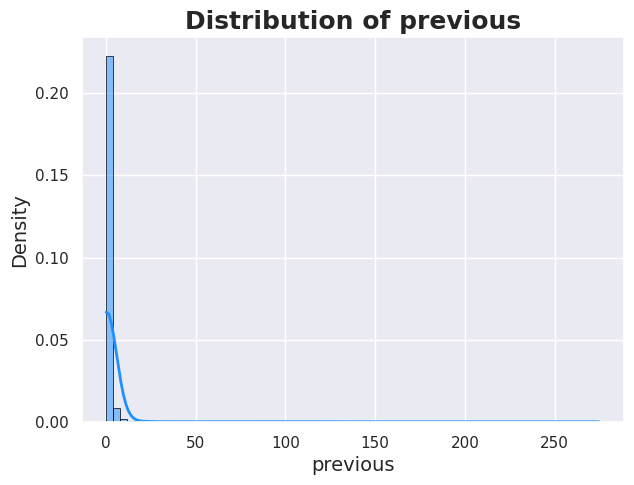

In [914]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
plt.figure(figsize=(7, 5))
sns.histplot(x=train['previous'], bins=70, color='dodgerblue', kde=True, edgecolor='black', 
             stat="density", line_kws={'color': 'blue', 'linewidth': 2})
plt.title("Distribution of previous", fontsize=18, fontweight='bold')
plt.xlabel("previous", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True) 
plt.show()

### Insights:
### Skewed Distribution: Similar to the pdays distribution, the "previous" variable is also highly right-skewed. The majority of the density is concentrated around zero, meaning most customers have been contacted very few times before the current campaign.
### Long Tail: A small number of customers have been contacted many times before (the long tail extending beyond 50). This could indicate that while most people receive few contacts, there are a handful of individuals with a much higher frequency of previous contact.
### Potential Insights: Most customers have been contacted only once or a few times, suggesting they are not part of a long-term recurring marketing effort. The customers in the long tail may require special attention, as too many contacts could lead to diminishing returns or fatigue in response rates.

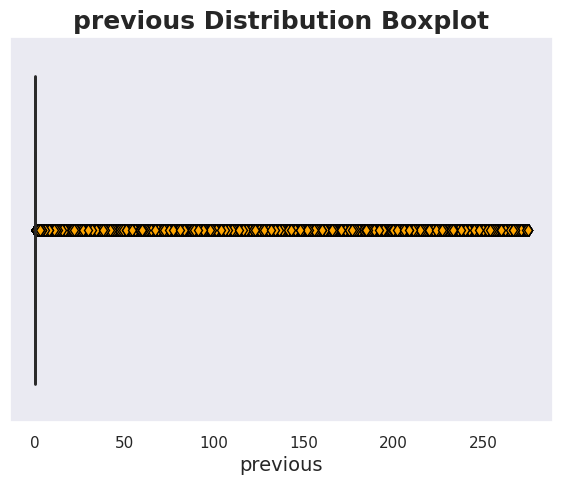

In [915]:
sns.set_style("dark")
plt.figure(figsize=(7,5)) 
sns.boxplot(
    x=train['previous'], 
    color='darkcyan',    
    linewidth=2, 
    fliersize=6, 
    flierprops={'markerfacecolor':'orange', 'markeredgecolor':'black'}  
)
plt.title("previous Distribution Boxplot", fontsize=18, fontweight='bold')
plt.xlabel("previous", fontsize=14)
plt.tick_params()
plt.show()

### Insights:
### The plot suggests that all the data points are very closely packed or identical along a single line. There is no visible box or whiskers, implying that the data might have little to no variation, or that the majority of the values are concentrated around a single value with few or no outliers.
### The box itself is compressed into the horizontal line, which could mean that the "previous" variable is nearly constant across the dataset.
### The absence of outliers suggests a lack of significant deviations from the central tendency (median).

## poutcome

In [916]:
train['poutcome'].head()

0    other
1      NaN
2      NaN
3      NaN
4      NaN
Name: poutcome, dtype: object

In [917]:
train['poutcome'].value_counts()

poutcome
failure    4949
other      2560
success    2251
Name: count, dtype: int64

In [918]:
train['poutcome'].describe()

count        9760
unique          3
top       failure
freq         4949
Name: poutcome, dtype: object

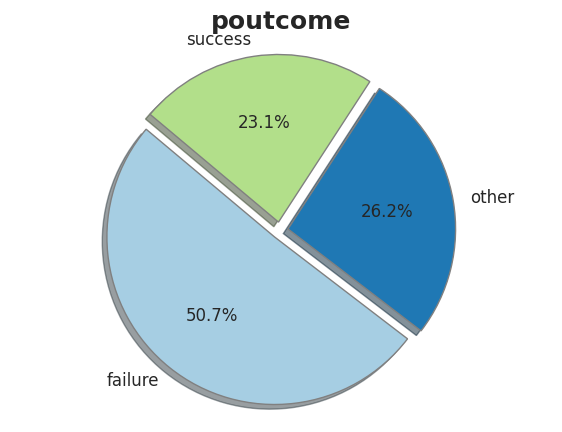

In [919]:
values = list(train['poutcome'].value_counts().keys())
proportion = list(train['poutcome'].value_counts().values)
colors = plt.cm.Paired(range(len(values)))  
explode = [0.05] * len(values)  
plt.figure(figsize=(7, 5))
plt.pie(x=proportion, labels=values, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, 
        startangle=140, wedgeprops={'edgecolor': 'gray'}, textprops={'fontsize': 12})
plt.title("poutcome", fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

### Insights:
### Failure (50.7%): This represents the largest portion of the outcomes, with just over half of the cases falling into the "failure" category. This suggests that in the dataset, the majority of the previous outcomes resulted in failure.

### Other (26.2%): This is the second largest category. It likely includes outcomes that don't fall strictly under "success" or "failure" and could indicate a neutral or undefined outcome.

### Success (23.1%): This is the smallest portion, showing that less than a quarter of the previous outcomes were considered successful.

## target

In [920]:
train['target'].head()

0    no
1    no
2    no
3    no
4    no
Name: target, dtype: object

In [921]:
train['target'].value_counts()

target
no     33384
yes     5827
Name: count, dtype: int64

In [922]:
train['target'].describe()

count     39211
unique        2
top          no
freq      33384
Name: target, dtype: object

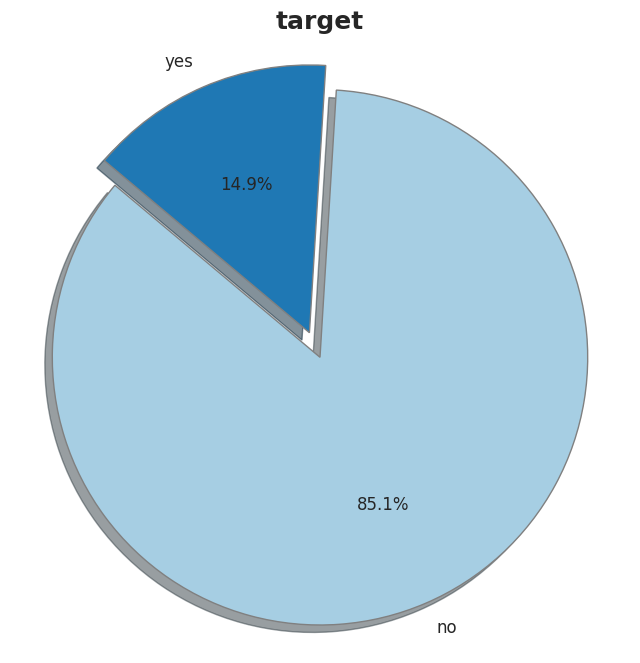

In [923]:
values = list(train['target'].value_counts().keys())
proportion = list(train['target'].value_counts().values)
colors = plt.cm.Paired(range(len(values)))  
explode = [0.05] * len(values)  
plt.figure(figsize=(8, 8))
plt.pie(x=proportion, labels=values, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, 
        startangle=140, wedgeprops={'edgecolor': 'gray'}, textprops={'fontsize': 12})
plt.title("target", fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

# MultiVariate Analysis :

## Relation between Age and Job

In [924]:
age_cat = []
for i in train['age']:
    if int(i)<30:
        age_cat.append("young")
    elif i<=50:
        age_cat.append("middle")
    else:
        age_cat.append("old")

In [925]:
train['age_cat'] = age_cat

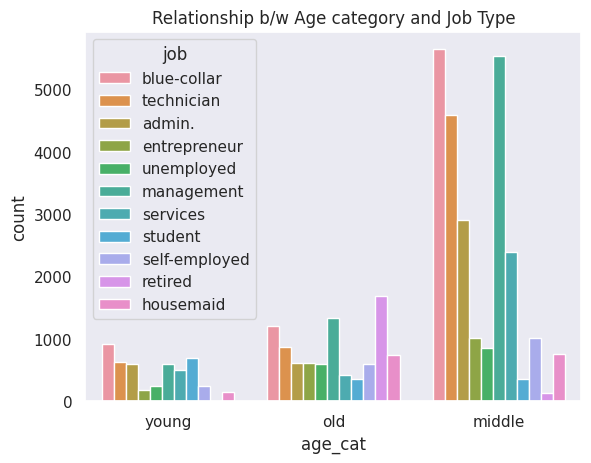

In [926]:
sns.countplot(x='age_cat',hue='job',data=train)
plt.title("Relationship b/w Age category and Job Type")
plt.show()

### Insights:
### The chart shows that middle-aged individuals dominate the workforce, especially in blue-collar, admin, and technician roles. 
### Young individuals are primarily students, unemployed, or in service jobs, while old individuals are mostly retired. 
### Blue-collar and admin jobs are the most common overall. 
### Less frequent job types include housemaid and entrepreneur roles across all age groups.

## Relation between Job and Education

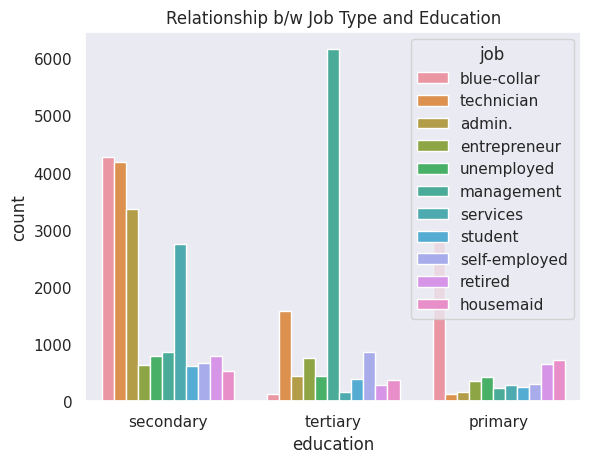

In [927]:
sns.countplot(x='education',hue='job',data=train)
plt.title("Relationship b/w Job Type and Education")
plt.show()

### Insights:
### The chart shows that secondary education dominates job distribution, especially for blue-collar, technician, and admin roles. 
### Tertiary education is linked to admin, management, and student categories, reflecting advanced roles or ongoing education. 
### Primary education is more common among blue-collar and housemaid roles. 
### Unemployment decreases with higher education levels.

## Relation between Martial Status and Housing

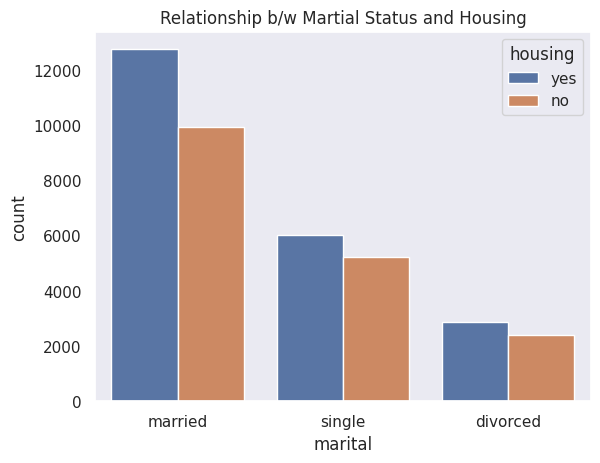

In [928]:
sns.countplot(x='marital',hue='housing',data=train)
plt.title("Relationship b/w Martial Status and Housing")
plt.show()

### Insights:
### The chart shows that married individuals are the largest group with housing loans, though many also lack them. 
### Single individuals have a balanced distribution between having and not having housing loans. 
### Divorced individuals are the smallest group overall, with fewer having housing loans compared to married or single individuals. 
### Housing loans are most common among the married population.

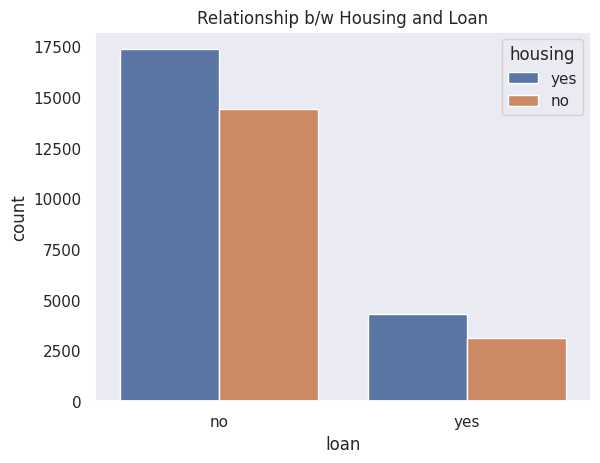

In [929]:
sns.countplot(x='loan',hue='housing',data=train)
plt.title("Relationship b/w Housing and Loan")
plt.show()

### Insights:
### Higher Proportion Without Loans: A significantly larger proportion of individuals do not have loans (loan = no), compared to those who do (loan = yes).
### Housing Preference Among Non-loan Holders: Among individuals without loans, a larger number have housing loans (housing = yes) compared to those without housing loans (housing = no).
### Loan Holders and Housing Trends: For individuals with loans (loan = yes), there are more people with housing loans (housing = yes) than those without housing loans (housing = no), but the numbers are closer compared to non-loan holders.
### Overall Housing Loan Dominance: Across both loan categories (loan = no and loan = yes), having housing loans (housing = yes) seems to be the more common choice.

## Relation between Duration and Campaign

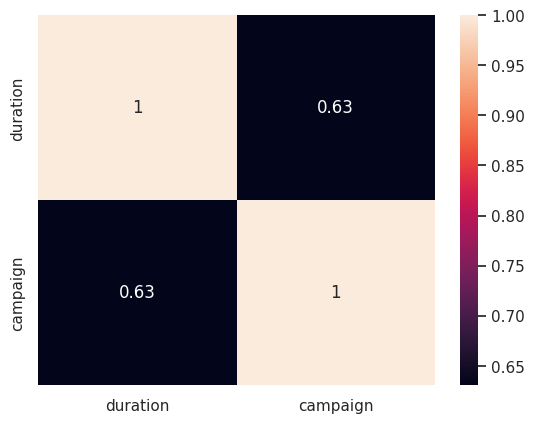

In [930]:
corr = train[['duration','campaign']].corr()
sns.heatmap(corr,annot=True)
plt.show()

### Insghts:
### The diagonal values of 1 indicate perfect self-correlation (expected for the same variables).
### The correlation coefficient between duration and campaign is 0.63, indicating a moderately positive relationship.
### A higher duration of engagement may align with more intense or prolonged campaign activity.

## Relation between Poutcome and Target

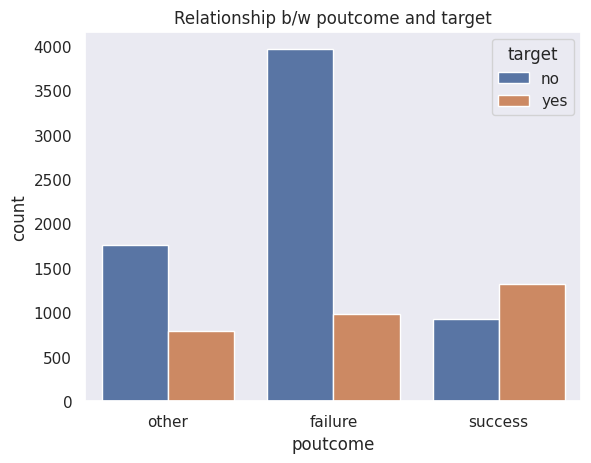

In [931]:
sns.countplot(x='poutcome', hue='target', data=train)
plt.title("Relationship b/w poutcome and target")
plt.show()

### Insights :
### For the "failure" category of poutcome, the majority of target values are "no."
### For the "success" category, the majority of target values are "yes."
### The "other" category shows a relatively balanced distribution, though slightly more "no" than "yes."

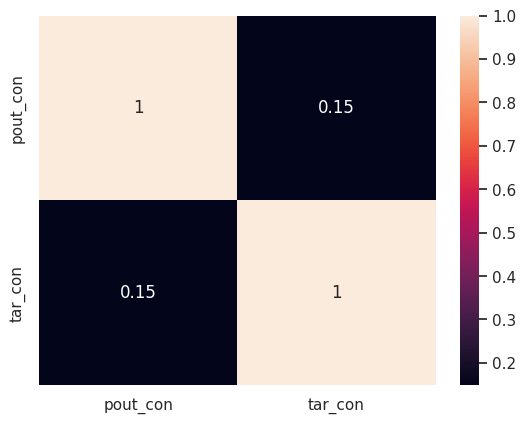

In [932]:
train_copy = train
train_copy = train_copy.dropna(subset=['target', 'poutcome'])
train_copy['tar_con'] = train_copy['target'].apply(lambda x: 1 if x == 'yes' else 0)
poutcome_map = {'success': 1, 'failure': 0, 'other': 2, 'unknown': 3}
train_copy['pout_con'] = train_copy['poutcome'].map(poutcome_map)
corr = train_copy[['pout_con', 'tar_con']].corr()

sns.heatmap(corr, annot=True)
plt.show()

### Insights:
### Correlation is 0.15, indicating a weak positive relationship.


In [933]:
train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,lcd_year,lcd_month,lcd_weekday,age_cat
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no,2009,4,4,young
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no,2009,10,6,old
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no,2010,11,5,middle
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no,2009,9,1,middle
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no,2008,1,1,middle


# Pre-Processing

In [934]:
train.drop(columns=['last contact date','age_cat'], inplace=True)
test.drop(columns=['last contact date'], inplace=True)

In [935]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,lcd_year,lcd_month,lcd_weekday
0,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no,2009,4,4
1,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no,2009,10,6
2,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no,2010,11,5
3,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no,2009,9,1
4,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no,2008,1,1


In [936]:
X = train.drop(columns = ['target'])
y = train['target']

In [937]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'target', 'lcd_year', 'lcd_month', 'lcd_weekday'],
      dtype='object')

In [938]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          39211 non-null  int64 
 1   job          38982 non-null  object
 2   marital      39211 non-null  object
 3   education    37744 non-null  object
 4   default      39211 non-null  object
 5   balance      39211 non-null  int64 
 6   housing      39211 non-null  object
 7   loan         39211 non-null  object
 8   contact      28875 non-null  object
 9   duration     39211 non-null  int64 
 10  campaign     39211 non-null  int64 
 11  pdays        39211 non-null  int64 
 12  previous     39211 non-null  int64 
 13  poutcome     9760 non-null   object
 14  target       39211 non-null  object
 15  lcd_year     39211 non-null  int32 
 16  lcd_month    39211 non-null  int32 
 17  lcd_weekday  39211 non-null  int32 
dtypes: int32(3), int64(6), object(9)
memory usage: 4.9+ MB


## Categorical Data to Numerical Data

In [939]:
categorical_col = ['job', 'marital', 'education','default','housing','loan','contact','lcd_year','poutcome'] 
encoder_dictionary = {}
for i in categorical_col:
    encode_label = LabelEncoder()
    X[i] = encode_label.fit_transform(X[i])    
    test[i] = encode_label.transform(test[i])
    encoder_dictionary[i] = encode_label

# Imputation


In [940]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

col = X.columns

imputer = IterativeImputer()
X = imputer.fit_transform(X)
test = imputer.transform(test)

X = pd.DataFrame(X,columns=col)
test = pd.DataFrame(test,columns=col)

# Label-Column Encoding

In [941]:
label = LabelEncoder()
y = label.fit_transform(y)
y = pd.DataFrame(y,columns=['target'])

In [942]:
X.drop(columns=['lcd_year'], inplace=True)
test.drop(columns=['lcd_year'], inplace=True)

In [943]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [944]:
numeric_column = ['age', 'balance', 'duration','pdays', 'previous']
categorical_column = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome']

In [945]:
Transformer = ColumnTransformer([('scale',StandardScaler(),numeric_column),
                                ('encode',OneHotEncoder(),categorical_column)],remainder='passthrough')

In [946]:
Transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['age', 'balance', 'duration', 'pdays',
                                  'previous']),
                                ('encode', OneHotEncoder(),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'poutcome'])])

In [947]:
X_train_transformed = Transformer.fit_transform(X_train) 
X_val_transformed = Transformer.transform(X_val)

X_test_final = Transformer.transform(test)

In [948]:
X_train_transformed

array([[ 0.53413504, -0.25637322, -0.46339185, ...,  2.        ,
         5.        ,  3.        ],
       [ 1.4725442 , -0.24809433, -0.2452154 , ...,  1.        ,
         4.        ,  3.        ],
       [ 1.08154038, -0.32692637,  0.12058943, ...,  3.        ,
         7.        ,  2.        ],
       ...,
       [ 0.14313123, -0.25290339, -0.19295756, ...,  1.        ,
         5.        ,  4.        ],
       [-0.40427411, -0.29685454, -0.48690787, ...,  4.        ,
         8.        ,  4.        ],
       [ 0.29953275,  0.25649161, -0.15637708, ...,  1.        ,
        11.        ,  0.        ]])

# Feature Engineering

## SelectKBest

In [949]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif,k=10)
X_selected_train = selector.fit_transform(X_train,y_train)
X_selected_val = selector.transform(X_val)

X_selected_train = pd.DataFrame(X_selected_train,columns=X_train.columns[selector.get_support()])
X_selected_val = pd.DataFrame(X_selected_val,columns=X_train.columns[selector.get_support()])

## Recursive Feature Engineering (RFE)

In [950]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe_selector = RFE(model,n_features_to_select=9)
X_selected_train = rfe_selector.fit_transform(X_train,y_train)
X_selected_val = rfe_selector.transform(X_val)
X_selected_train = pd.DataFrame(X_selected_train,columns=X_train.columns[rfe_selector.get_support()])
X_selected_val = pd.DataFrame(X_selected_val,columns=X_train.columns[rfe_selector.get_support()])

# PCA

In [951]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_train_reduced_pca = pca.fit_transform(X_selected_train)
X_val_reduced_pca = pca.transform(X_selected_val)

X_train_pca = pd.DataFrame(X_train_reduced_pca)
X_val_pca = pd.DataFrame(X_val_reduced_pca)

In [952]:
X_val_pca

,0,1,2,3,4,5
0,-4.141381,0.175348,0.054736,-0.750284,-0.450873,-0.852307
1,-2.148885,-2.826997,0.315405,-0.481758,-0.799533,1.082640
2,-3.145518,-0.721982,1.157565,1.109878,0.180895,1.075169
3,7.874920,-2.847328,0.212039,0.621298,0.113570,0.090892
4,-4.133168,0.280322,1.043068,0.998794,0.361031,0.111398
...,...,...,...,...,...,...
7838,2.861978,1.152239,0.260885,-0.169760,-1.227018,-1.130448
7839,28.940212,-1.014695,-1.083724,0.570896,1.092342,1.209132
7840,-3.146328,1.167023,-0.101666,-1.781952,1.196496,-0.393477
7841,-4.041525,1.054818,-2.596924,0.557803,0.155885,-0.853610


# SVD

In [953]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 30)
X_train_reduced_svd = svd.fit_transform(X_train_transformed)
X_val_reduced_svd = svd.transform(X_val_transformed)

X_train_svd = pd.DataFrame(X_train_reduced_svd)
X_val_svd = pd.DataFrame(X_val_reduced_svd)

In [954]:
X_val_svd

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,5.572146,-10.097580,1.655311,0.331194,0.691985,0.916455,-0.030112,0.439462,-0.856929,-0.115414,...,-0.092804,0.109427,-0.011731,-0.041097,0.155122,-0.026377,-0.069217,-0.113737,-0.023589,0.006903
1,5.417314,-5.082190,2.613808,-1.026629,-0.051137,0.048714,-0.251273,0.894375,-0.679858,-0.357438,...,0.544926,0.459852,0.056614,-0.036964,-0.025720,-0.253029,-0.106353,-0.039091,-0.043531,-0.074866
2,4.081011,-4.515522,-0.145222,-0.835413,0.292580,-0.273074,1.243529,0.120760,-0.088761,-0.603183,...,-0.117984,0.118712,-0.039417,0.024892,-0.054169,0.030897,0.007272,0.007071,0.007580,0.067101
3,16.505142,-4.610238,4.840949,0.636804,2.336808,-0.436879,0.743737,-1.350144,-0.733243,-0.278463,...,-0.264368,-0.127509,-0.374818,0.860589,-0.110747,0.082180,-0.029118,-0.036736,-0.150986,0.859616
4,3.304303,-5.207530,-0.981550,-0.491745,-0.089566,-0.349980,1.230617,-0.255944,-0.147269,-0.036206,...,-0.210552,-0.007558,0.950176,-0.109764,-0.681944,-0.122818,0.167496,0.173401,0.028189,0.068849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7838,10.571799,-4.490324,-1.128002,-1.206551,0.735111,0.043338,0.027403,-0.444303,0.159247,-0.267412,...,-0.042394,-0.070800,0.011380,0.039465,0.076099,-0.002871,-0.078863,-0.100111,-0.023807,-0.061619
7839,35.347685,6.389248,2.506891,4.565737,-1.844417,1.694444,1.084850,1.045011,0.822409,-0.847618,...,0.215138,0.507416,0.765090,-0.314523,-0.214760,-0.020951,-0.564246,0.453282,-0.309869,-0.359971
7840,5.121014,-6.803568,-0.898467,-0.073666,-0.082858,0.669163,-0.822182,0.231211,-0.370772,-0.528329,...,0.553878,0.595666,-0.002219,-0.027130,0.497794,-0.610312,0.311004,0.636283,0.011913,-0.098981
7841,4.571036,-7.960035,-0.490692,0.177669,1.557455,0.247481,-0.982445,0.144148,-1.047245,-0.293609,...,0.570964,-0.021528,-0.132068,-0.045082,-0.234962,0.214511,0.289955,0.230344,0.033057,0.215445


# Model Training

In [955]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [956]:
from sklearn.linear_model import LogisticRegression

In [957]:
model_1 = LogisticRegression(random_state = 42)

model_1.fit(X_train_transformed, y_train)
y_pred = model_1.predict(X_val_transformed)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6677
           1       0.58      0.23      0.33      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.60      0.62      7843
weighted avg       0.83      0.86      0.83      7843



### Hyperparameter Tunning of Logistic Regression

In [958]:
#from sklearn.model_selection import GridSearchCV

#param_grid ={
    #'penalty' : ['l1', 'l2', 'elasticnet'],
    #'C' : [0.01, 0.1, 1, 10, 100],
    #'solver' : ['lbfgs', 'liblinear','saga', 'newton-cg']  
#}

#model = LogisticRegression(random_state = 42, max_iter = 10000)

#lg_gscv = GridSearchCV(estimator = model,param_grid = param_grid, cv = 5, verbose = 1, n_jobs = -1)
#lg_gscv.fit(X_train_transformed, y_train)

#best_parameters = lg_gscv.best_params_
#best_parameters

{max_iter=10000, penalty='l2', C=10, solver='lbfgs'}

In [959]:
best_model_1 = LogisticRegression(random_state=42, max_iter=10000, penalty='l2', C=10, solver='lbfgs')
best_model_1.fit(X_train_transformed, y_train)  
y_pred = best_model_1.predict(X_val_transformed)

report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6677
           1       0.58      0.23      0.33      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.60      0.62      7843
weighted avg       0.83      0.86      0.83      7843



### Decision Tree

In [960]:
# from sklearn.tree import DecisionTreeClassifier

In [961]:
# model_2 = DecisionTreeClassifier(random_state = 42)
# model_2.fit(X_train_transformed, y_train)
# y_pred = model_2.predict(X_val_transformed)
# print(classification_report(y_val, y_pred))
# print(roc_auc_score(y_val, y_pred))

## Random Forest

In [962]:
from sklearn.ensemble import RandomForestClassifier

In [963]:
model_3 = RandomForestClassifier()
model_3.fit(X_train_transformed, y_train)
y_pred = model_3.predict(X_val_transformed)

print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      6677
           1       0.59      0.38      0.47      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.67      0.70      7843
weighted avg       0.85      0.87      0.86      7843

0.6683376615302884


In [964]:
model_3s = RandomForestClassifier()
model_3s.fit(X_train_svd, y_train)
y_pred = model_3s.predict(X_val_svd)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      6677
           1       0.58      0.32      0.41      1166

    accuracy                           0.87      7843
   macro avg       0.74      0.64      0.67      7843
weighted avg       0.84      0.87      0.85      7843

0.63975036806158


### HyperParameter Tunning of RandomForest

In [965]:
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],         
#     'max_depth': [None, 10, 20, 25, 30],        
#     'min_samples_split': [2, 3, 4, 5, 10],        
#     'min_samples_leaf': [1, 2, 3, 4],
#     'max_features': ['sqrt', 'log2', None],  
#     'class_weight': [None, 'balanced', 'balanced_subsample'],
#     'bootstrap': [True, False]              
# }

# rf_model = RandomForestClassifier(random_state=42)

# rf_gscv = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, verbose=1, n_jobs=-1)
# rf_gscv.fit(X_train_transformed, y_train)

# best_parameters = rf_gscv.best_params_
# best_parameters

{n_estimators=200, max_depth=25, min_samples_leaf=3, min_samples_split=4, max_features='log2', class_weight='balanced_subsample', bootstrap=True}


In [966]:
best_model_3 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=25, min_samples_leaf=3, min_samples_split=4, max_features='log2', class_weight='balanced_subsample', bootstrap=True)

best_model_3.fit(X_train_transformed, y_train)
y_pred = best_model_3.predict(X_val_transformed)

report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6677
           1       0.51      0.74      0.60      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.81      0.76      7843
weighted avg       0.89      0.86      0.87      7843



## XGBClassifier

In [967]:
from xgboost import XGBClassifier

In [968]:
model_4 = XGBClassifier(random_state = 42)
model_4.fit(X_train_transformed, y_train)
y_pred = model_4.predict(X_val_transformed)
print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6677
           1       0.59      0.48      0.53      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.71      0.73      7843
weighted avg       0.86      0.87      0.87      7843

0.7110822564647438


### HyperParameter Tunning of XGBClassifier


In [969]:
# param_grid_xgb = {
#     'colsample_bytree': [0.8, 1.0], 
#     'learning_rate': [0.1, 0.2, 0.3], 
#     'max_depth': [3, 5, 7],  
#     'scale_pos_weight': [1, 2, 5],  
#     'n_estimators': [100, 200, 300], 
#     'subsample': [0.8, 1.0]     
# }


# xgb_model  = XGBClassifier(random_state=42)
# xgb_gscv = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, verbose=1, n_jobs=-1)
# xgb_gscv.fit(X_train_transformed, y_train)

# best_parameters = xgb_gscv.best_params_
# best_parameters

{colsample_bytree=1.0, learning_rate=0.2, max_depth=3, scale_pos_weight=2, n_estimators=200, subsample=1.0}


In [970]:
best_model_4 = XGBClassifier(random_state=0, colsample_bytree=1.0, learning_rate=0.2, max_depth=3, scale_pos_weight=2, n_estimators=200, subsample=1.0)

# best_model_4 = XGBClassifier(
#     random_state=0,
#     colsample_bytree=0.9,    # Slightly higher to use more features
#     learning_rate=0.05,      # Lower for finer weight updates
#     max_depth=4,             # Reduced to prevent overfitting
#     scale_pos_weight=3,      # Higher to emphasize class 1
#     n_estimators=300,        # Reduced iterations to avoid overfitting
#     subsample=0.9           # Increased sample size for better generalization
# )

# best_model_4 = XGBClassifier(
#     random_state=0,
#     colsample_bytree=0.8,    # Lower to focus on a subset of features per tree
#     learning_rate=0.03,      # Slower learning for fine-tuning
#     max_depth=4,             # Balance between complexity and generalization
#     scale_pos_weight=3,      # Increased emphasis on class 1
#     n_estimators=400,        # More trees for detailed learning
#     subsample=0.85,          # Prevent overfitting by using a subset of samples
#     min_child_weight=3,      # Minimum weight sum of child nodes for split
#     gamma=1.5,               # Minimum loss reduction for further splits
#     reg_alpha=0.1,           # L1 regularization to reduce model complexity
#     reg_lambda=1.0           # L2 regularization to prevent overfitting
# )

best_model_4.fit(X_train_transformed, y_train)
y_pred = best_model_4.predict(X_val_transformed)

print(classification_report(y_val, y_pred))
print(roc_auc_score(y_val, y_pred))
from sklearn.metrics import f1_score
f1_macro = f1_score(y_val, y_pred, average='macro')
print(f"F1 Macro Average Score: {f1_macro:.6f}")

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      6677
           1       0.54      0.71      0.62      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.80      0.77      7843
weighted avg       0.89      0.87      0.88      7843

0.802028789338789
F1 Macro Average Score: 0.767926


In [971]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Combine models into an ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', best_model_4),
        ('logreg', LogisticRegression(random_state=0))
    ],
    voting='soft'  # Weighted average of probabilities
)

# Train ensemble model
ensemble_model.fit(X_train_transformed, y_train)

# Evaluate
y_ensemble_pred = ensemble_model.predict(X_val_transformed)
print(classification_report(y_val, y_ensemble_pred))


              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6677
           1       0.58      0.38      0.46      1166

    accuracy                           0.87      7843
   macro avg       0.74      0.67      0.69      7843
weighted avg       0.85      0.87      0.86      7843



In [972]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
ensemble_model_alt = VotingClassifier(
    estimators=[
        ('xgb', best_model_4),
        ('lgm',LGBMClassifier(random_state=0, is_unbalance=False, lambda_l2=0, max_depth=-1, bagging_fraction=1.0 , scale_pos_weight=2)
)
        #('rf', RandomForestClassifier(random_state=42, n_estimators=200, max_depth=25, min_samples_leaf=3, min_samples_split=4, max_features='log2', class_weight='balanced_subsample', bootstrap=True)
#)
    ],
    voting='hard',
    weights=[2,1]
)

# Train and evaluate
ensemble_model_alt.fit(X_train_transformed, y_train)
y_alt_pred = ensemble_model_alt.predict(X_val_transformed)
print(classification_report(y_val, y_alt_pred))
f1_macro = f1_score(y_val, y_alt_pred, average='macro')
print(f"F1 Macro Average Score: {f1_macro:.6f}")

[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696
[LightGBM

In [973]:
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', best_model_4),
        ('logreg', LogisticRegression(random_state=0))
    ],
    voting='soft', 
    weights=[2, 1]  # Give XGB more influence
)

# Train and evaluate
ensemble_model.fit(X_train_transformed, y_train)
y_ensemble_pred = ensemble_model.predict(X_val_transformed)
print(classification_report(y_val, y_ensemble_pred))
f1_macro = f1_score(y_val, y_pred, average='macro')
print(f"F1 Macro Average Score: {f1_macro:.6f}")

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6677
           1       0.58      0.54      0.56      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.74      0.74      7843
weighted avg       0.87      0.87      0.87      7843

F1 Macro Average Score: 0.767926


### KNN

In [974]:
# from sklearn.neighbors import KNeighborsClassifier

In [975]:
# model_5 = KNeighborsClassifier(n_neighbors=5)
# model_5.fit(X_train_transformed, y_train)
# y_pred = model_5.predict(X_val_transformed)
# print(classification_report(y_val, y_pred))
# print(roc_auc_score(y_val, y_pred))

## LightBGMClassifier

In [976]:
from lightgbm import LGBMClassifier

In [977]:
model_6 = LGBMClassifier(random_state=42)
model_6.fit(X_train_transformed, y_train)
y_pred = model_6.predict(X_val_transformed)
report = classification_report(y_val, y_pred)

print(report)
print(roc_auc_score(y_val, y_pred))

[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6677
           1       0.58      0.48      0.53      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.71      0.73      7843
weighted avg       0.86      0.87      0.87      7843

0.7107622336322097


### HyperParameter Tunning of LGBMClassifier

In [978]:
# param_grid_lgm = {
#     'is_unbalance': [False], 
#     'lambda_l2': [0, 1, 5, 10],  
#     'max_depth': [-1, 5, 10, 15],  
#     'bagging_fraction': [0.8, 1.0], 
#     'scale_pos_weight': [1, 2, 5]  
# }
# lgm_model = LGBMClassifier(random_state=42)
# lgm_gscv = GridSearchCV(estimator=lgm_model, param_grid=param_grid_lgm, cv=5, verbose=1, n_jobs=-1)
# lgm_gscv.fit(X_train_transformed, y_train)

# best_parameters = lgm_gscv.best_params_
# best_parameters


{is_unbalance=False, lambda_l2=0, max_depth=-1, bagging_fraction=1.0 , scale_pos_weight=2}


In [979]:
best_model_6 = LGBMClassifier(random_state=42, is_unbalance=False, lambda_l2=0, max_depth=-1, bagging_fraction=1.0 , scale_pos_weight=2)
best_model_6.fit(X_train_transformed, y_train)
y_pred = best_model_6.predict(X_val_transformed)
report = classification_report(y_val, y_pred)

print(report)
print(roc_auc_score(y_val, y_pred))

from sklearn.metrics import f1_score

# Assuming y_val and y_pred are defined
f1_macro = f1_score(y_val, y_pred, average='macro')
print(f"F1 Macro Average Score: {f1_macro:.6f}")

[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696
[LightGBM

## HistGradientBoostingClassifier

In [980]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier

In [986]:
model_hist_gb = HistGradientBoostingClassifier(
    learning_rate=0.05,  # Slower learning rate for fine-tuning
    max_iter=300,        # More trees for detailed learning
    max_depth=5,         # Moderate depth for generalization
    min_samples_leaf=10, # Prevents overfitting by requiring more samples in each leaf
    l2_regularization=1.0, # Regularization to avoid overfitting
    max_bins=200,        # Moderate number of bins for histograms
    #subsample=0.8,       # Slight randomness for better generalization
    random_state=0
)
model_hist_gb.fit(X_train_transformed, y_train, sample_weight=5)
y_pred = model_hist_gb.predict(X_val_transformed)
report = classification_report(y_val, y_pred)
print(report)
print(roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6677
           1       0.59      0.44      0.50      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.69      0.71      7843
weighted avg       0.86      0.87      0.86      7843

0.6923916514308482


# Model Comparion

[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696
[LightGBM

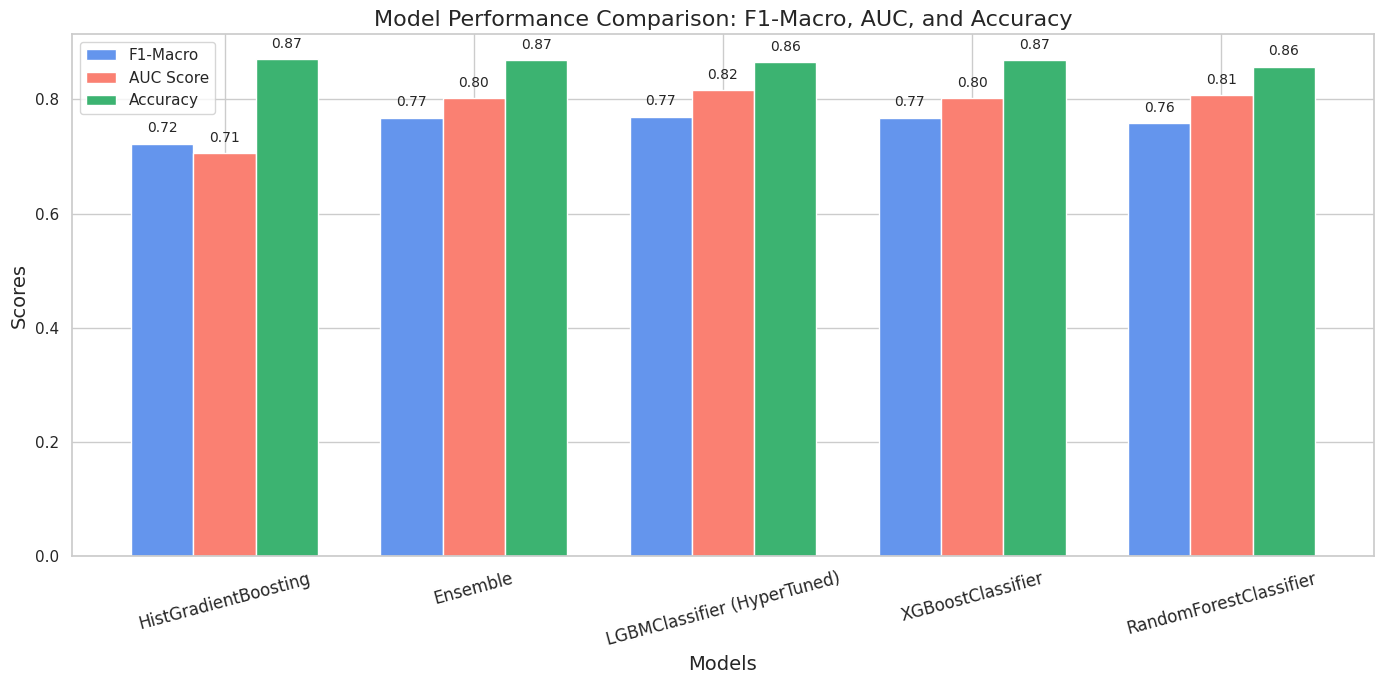

In [982]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


models = {
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=0),
    'Ensemble': ensemble_model_alt,
    'LGBMClassifier (HyperTuned)': LGBMClassifier(random_state=0, is_unbalance=False, lambda_l2=0, max_depth=-1, bagging_fraction=1.0, scale_pos_weight=2),
    'XGBoostClassifier': XGBClassifier(random_state=0, colsample_bytree=1.0, learning_rate=0.2, max_depth=3, scale_pos_weight=2, n_estimators=200, subsample=1.0),
    'RandomForestClassifier': RandomForestClassifier(random_state=42, n_estimators=200, max_depth=25, min_samples_leaf=3, min_samples_split=4, max_features='log2', class_weight='balanced_subsample', bootstrap=True)
}


f1_scores, auc_scores, accuracies = [], [], []


for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_val_transformed)
    
    f1_scores.append(f1_score(y_val, y_pred, average='macro'))
    auc_scores.append(roc_auc_score(y_val, y_pred))
    accuracies.append(accuracy_score(y_val, y_pred))


sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))


width = 0.25
x = range(len(models))


ax.bar([pos - width for pos in x], f1_scores, width=width, label='F1-Macro', color='cornflowerblue')
ax.bar(x, auc_scores, width=width, label='AUC Score', color='salmon')
ax.bar([pos + width for pos in x], accuracies, width=width, label='Accuracy', color='mediumseagreen')


ax.set_xticks(x)
ax.set_xticklabels(models.keys(), rotation=15, fontsize=12)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Model Performance Comparison: F1-Macro, AUC, and Accuracy', fontsize=16)
ax.legend(loc='best')


for i, (f1, auc, acc) in enumerate(zip(f1_scores, auc_scores, accuracies)):
    ax.text(i - width, f1 + 0.02, f'{f1:.2f}', ha='center', fontsize=10)
    ax.text(i, auc + 0.02, f'{auc:.2f}', ha='center', fontsize=10)
    ax.text(i + width, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Final Submission Code


In [983]:
y_pred = ensemble_model_alt.predict(X_test_final)
y_pred = label.inverse_transform(y_pred)

[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


In [984]:
# sub = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv")
# sub['target'] = y_pred
# sub.to_csv("submission.csv", index=False)
#submission.csv
#len(y_pred)

# Ensure the predictions align with the sample submission
sub = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv")
#print(f"Length of sample_submission: {len(sub)}")
#print(f"Length of predictions (y_pred): {len(y_pred)}")

# Assign predictions to the target column
sub['target'] = y_pred

# Save the submission file
sub.to_csv("submission.csv", index=False)
#print("Submission file created: submission.csv")
#sub